In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Extracting file direct from Kaggle 

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 23.8MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.7MB/s]


Zip open the files extacted from Kaggle 

In [6]:
import zipfile

zip_ref =zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

Using the Keras ImageDataGenerator library, images are fetched from the dataset. At a time, 32 images are retrieved, forming a batch of size 32. The image size is then reshaped to 256x256 pixels.

In [8]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#normalization
def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image, label



To ensure proper training, the images are scaled down, normalizing their pixel values to the range of 0 to 1. This preprocessing step is crucial for improving model convergence and performance during training.

In [10]:
train_ds = train_ds.map(process)

In [11]:
validation_ds = validation_ds.map(process)

Keras Sequential model is used for this project. The model architecture consists of convolutional layers with max-pooling, followed by fully connected (dense) layers. The model starts with a 3x3 convolutional layer with 32 filters, using ReLU activation and valid padding. This is followed by a 2x2 max-pooling layer with a stride of 2. The pattern is repeated for two more convolutional layers, each with 64 and 128 filters, respectively. Finally, the model flattens the output and connects to three dense layers with 128, 64, and 1 neuron(s), respectively. The last layer uses a sigmoid activation function to output binary classification predictions.'adam' is used as an optimizer while for loss we considered using 'binary_crossentropy'.

In [12]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
#model

model = Sequential()
model.add(Conv2D(32,kernel_size= (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))


model.add(Conv2D(64,kernel_size= (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))


model.add(Conv2D(128,kernel_size= (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [14]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 63s 101ms/step - loss: 0.0405 - accuracy: 0.9872 - val_loss: 1.2970 - val_accuracy: 0.7958
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.0300 - accuracy: 0.9898 - val_loss: 1.3475 - val_accuracy: 0.7784
Epoch 3/10
625/625 [==============================] - 59s 94ms/step - loss: 0.0257 - accuracy: 0.9912 - val_loss: 1.5594 - val_accuracy: 0.7954
Epoch 4/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0342 - accuracy: 0.9894 - val_loss: 1.2014 - val_accuracy: 0.7866
Epoch 5/10
625/625 [==============================] - 61s 97ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 1.6599 - val_accuracy: 0.7886
Epoch 6/10
625/625 [==============================] - 58s 92ms/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 1.4964 - val_accuracy: 0.7768
Epoch 7/10
625/625 [==============================] - 58s 92ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 1.5658 - val_accurac

From the figures below we can clearly see the model is overfitting

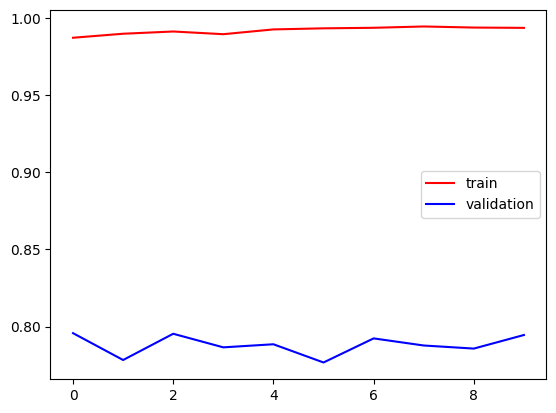

In [17]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

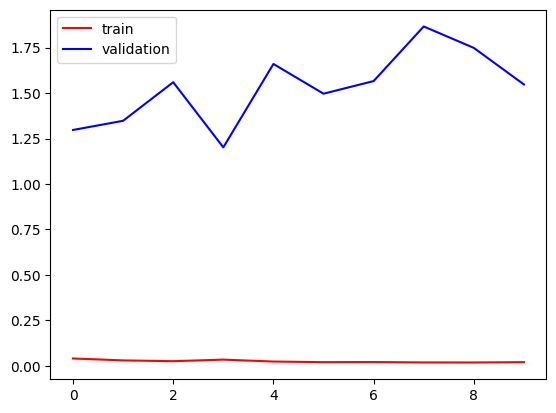

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
#overfitting
#dropout and batch normalization

The same model is being used but this time we have added BatchNormalization and Dropout to reduce overfitting 

In [26]:

#model

model1 = Sequential()
model1.add(Conv2D(32,kernel_size= (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))


model1.add(Conv2D(64,kernel_size= (3,3), padding = 'valid', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))


model1.add(Conv2D(128,kernel_size= (3,3), padding = 'valid', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dropout(0.4))
model1.add(Dense(1, activation = 'sigmoid'))

In [27]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
history1 = model1.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6507 - accuracy: 0.5966 - val_loss: 0.6015 - val_accuracy: 0.6560
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5886 - accuracy: 0.6729 - val_loss: 0.5684 - val_accuracy: 0.6782
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5238 - accuracy: 0.7291 - val_loss: 0.5111 - val_accuracy: 0.7464
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4713 - accuracy: 0.7696 - val_loss: 0.5052 - val_accuracy: 0.7444
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4416 - accuracy: 0.7931 - val_loss: 0.4626 - val_accuracy: 0.7710
Epoch 6/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3981 - accuracy: 0.8156 - val_loss: 0.5753 - val_accuracy: 0.7496
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3549 - accuracy: 0.8364 - val_loss: 0.5566 - val_ac

The overfitting has decreased a bit comapred to the first model

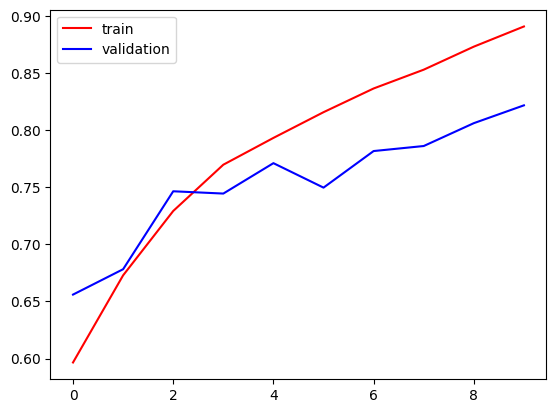

In [34]:
plt.plot(history1.history['accuracy'], color='red', label='train')
plt.plot(history1.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


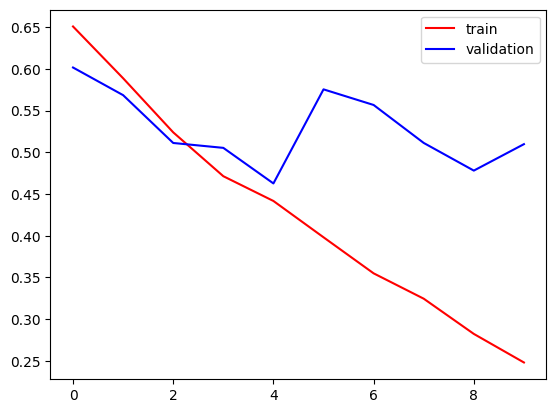

In [35]:
plt.plot(history1.history['loss'],color='red',label='train')
plt.plot(history1.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

For the final model, the number of filter layers were changed. (10,20,40,80) is being used while dense layers of (80,40,20,10,1) has been applied to reduce overfitting

In [38]:
#model

model2 = Sequential()
model2.add(Conv2D(10,kernel_size= (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))


model2.add(Conv2D(20,kernel_size= (3,3), padding = 'valid', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))


model2.add(Conv2D(40,kernel_size= (3,3), padding = 'valid', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))


model2.add(Conv2D(80,kernel_size= (3,3), padding = 'valid', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model2.add(Conv2D(160,kernel_size= (3,3), padding = 'valid', activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))



model2.add(Flatten())

model2.add(Dense(80, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(40, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(Dense(20, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation = 'sigmoid'))

In [39]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
history2 = model2.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 58s 84ms/step - loss: 0.7114 - accuracy: 0.5299 - val_loss: 0.6721 - val_accuracy: 0.6018
Epoch 2/10
625/625 [==============================] - 52s 82ms/step - loss: 0.6467 - accuracy: 0.6225 - val_loss: 0.5876 - val_accuracy: 0.6718
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.5743 - accuracy: 0.7074 - val_loss: 0.5317 - val_accuracy: 0.7308
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.5043 - accuracy: 0.7660 - val_loss: 0.4644 - val_accuracy: 0.7654
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.4375 - accuracy: 0.8108 - val_loss: 0.4490 - val_accuracy: 0.7946
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.3705 - accuracy: 0.8489 - val_loss: 0.3537 - val_accuracy: 0.8264
Epoch 7/10
625/625 [==============================] - 53s 84ms/step - loss: 0.3100 - accuracy: 0.8781 - val_loss: 0.2949 - val_accuracy:

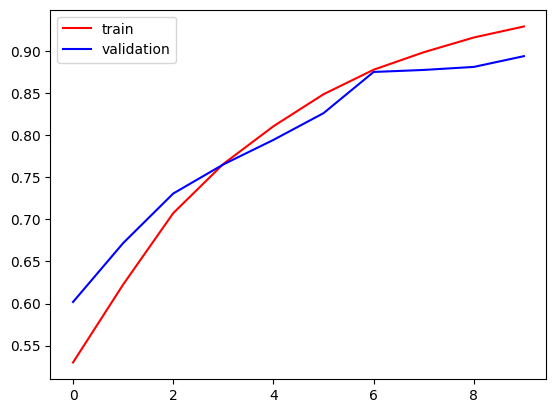

In [41]:
plt.plot(history2.history['accuracy'],color='red',label='train')
plt.plot(history2.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

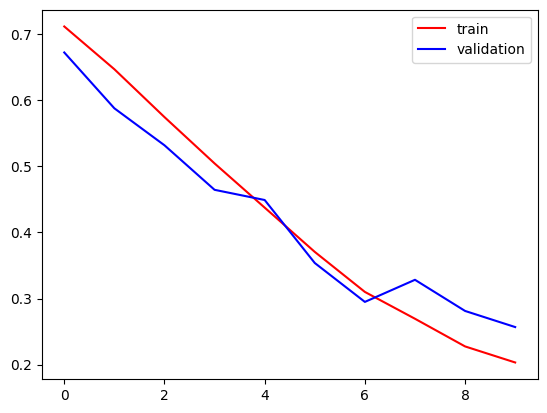

In [42]:
plt.plot(history2.history['loss'],color='red',label='train')
plt.plot(history2.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

**TESTING**

In [43]:
import cv2

In [44]:
model2.save('final_model.h5')

In [45]:
test_img = cv2.imread('/content/cat.jpg')

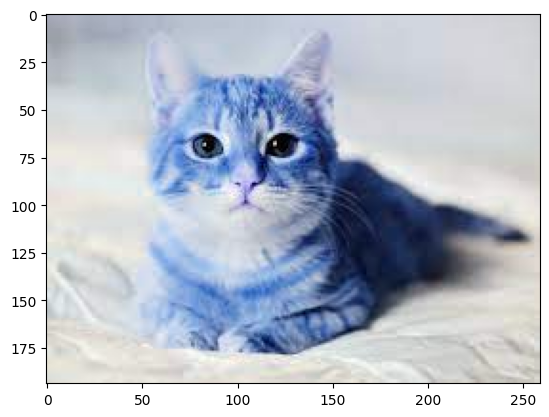

In [46]:
plt.imshow(test_img)

In [47]:
test_img = cv2.resize(test_img,(256,256))

In [48]:
test_input = test_img.reshape((1,256,256,3))

In [49]:
model2.predict(test_input)

1/1 [==============================] - 1s 541ms/step


array([[0.]], dtype=float32)

In [71]:
prediction1  = model2.predict(test_input)


1/1 [==============================] - 0s 28ms/step


In [59]:
test_img1 = cv2.imread('/content/dog2.jpg')

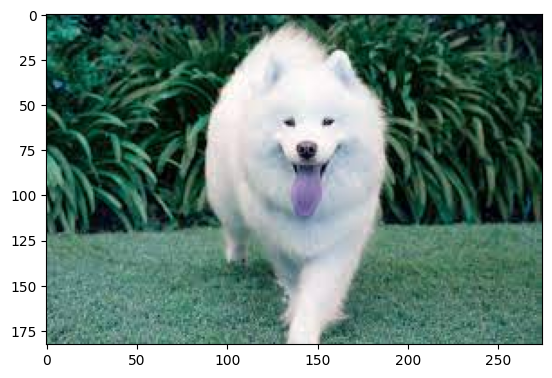

In [60]:
plt.imshow(test_img1)

In [61]:
test_img1 = cv2.resize(test_img1,(256,256))
test_input1 = test_img1.reshape((1,256,256,3))


In [62]:
prediction = model2.predict(test_input1)

1/1 [==============================] - 0s 31ms/step


In [63]:
prediction

array([[1.]], dtype=float32)

In [68]:
def pred(prediction):
  if prediction > 0.5:
    print("DOG")
  else:
    print("Cat")

In [69]:
pred(prediction)

DOG


In [70]:
pred(prediction1)

Cat
